In [25]:
import pandas as pd
resist = pd.read_csv('~/data0118/scoary_summary/resist.csv', index_col = 0, header = 0)
gold_anno = pd.read_csv('/home/hermuba/data0118/goldstandard/ec_rmplasmid_node_anno.csv', header = 0, index_col = 0) 

In [3]:
# read network
import networkx as nx
with open('/home/hermuba/data0118/network1122/combined_rm_plasmid_baye', 'rb') as f:
    next(f) # skip header
    combined = nx.read_edgelist(f, nodetype = str, comments = '#', delimiter = ',',  data=(('combined_lls',float),))

In [12]:
# nodes 
selected_nodes = gold_anno.loc[gold_anno['cluster'].isin(resist.columns)].index

In [14]:
sub_network = combined.subgraph(selected_nodes)

/home/hermuba/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


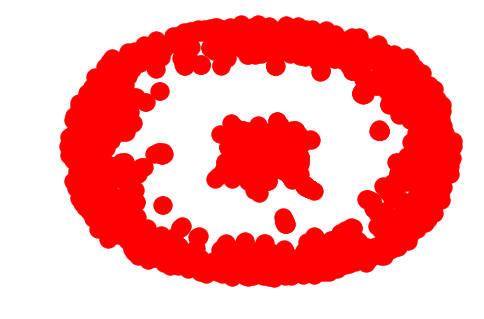

In [15]:
%matplotlib inline
nx.draw(sub_network)

In [16]:
nx.write_edgelist(sub_network,'/home/hermuba/data0118/network1122/sub_scoary')

In [31]:
d = pd.merge(gold_anno['cluster'], resist.transpose(), left_on = 'cluster', right_index = True)

In [32]:
d.to_csv('~/data0118/network1122/scoary_resist')